In [6]:
import glob
import pandas as pd
from pandas.api.types import infer_dtype
import numpy as np

In [29]:
%pylab inline

Matplotlib is building the font cache; this may take a moment.


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
fs=glob.glob('/scratch/gfif3/NC/*.csv')

In [3]:
RELOAD=True
if RELOAD: 
    th=pd.DataFrame()
    for f in fs:
        print(f)
        th=th.append(pd.read_csv(f))
        #break
    th=th.reset_index(drop=True)
    th.to_csv('/scratch/gfif3/ALL.csv',index=False)
    

/scratch/gfif3/NC/datbn2_9.csv
/scratch/gfif3/NC/data2_2.csv


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/scratch/gfif3/NC/datbn2_5.csv
/scratch/gfif3/NC/datb2_3.csv
/scratch/gfif3/NC/datb2_05.csv
/scratch/gfif3/NC/datb2_9.csv
/scratch/gfif3/NC/datb1_6.csv
/scratch/gfif3/NC/datan2_7.csv


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/scratch/gfif3/NC/datb2_15.csv
/scratch/gfif3/NC/data2_9.csv
/scratch/gfif3/NC/datbn2_7.csv
/scratch/gfif3/NC/datbn2_8.csv
/scratch/gfif3/NC/data1_3.csv
/scratch/gfif3/NC/datbn2_4.csv


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/scratch/gfif3/NC/datb1_0.csv
/scratch/gfif3/NC/data2_1.csv
/scratch/gfif3/NC/datan1_9.csv


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/scratch/gfif3/NC/datb2_125.csv
/scratch/gfif3/NC/datb1_1.csv
/scratch/gfif3/NC/datan1_0.csv
/scratch/gfif3/NC/data2_5.csv
/scratch/gfif3/NC/datbn1_4.csv
/scratch/gfif3/NC/datb1_7.csv
/scratch/gfif3/NC/datan2_4.csv
/scratch/gfif3/NC/datbn1_3.csv
/scratch/gfif3/NC/datan2_3.csv
/scratch/gfif3/NC/data2_125.csv
/scratch/gfif3/NC/datb1_2.csv
/scratch/gfif3/NC/datan2_1.csv
/scratch/gfif3/NC/datbn2_05.csv
/scratch/gfif3/NC/datb2_0.csv
/scratch/gfif3/NC/datb2_075.csv
/scratch/gfif3/NC/datb2_8.csv
/scratch/gfif3/NC/data2_7.csv
/scratch/gfif3/NC/data2_6.csv
/scratch/gfif3/NC/data2_05.csv
/scratch/gfif3/NC/datbn2_1.csv
/scratch/gfif3/NC/datan1_6.csv
/scratch/gfif3/NC/datb1_3.csv
/scratch/gfif3/NC/datan2_9.csv
/scratch/gfif3/NC/datbn2_125.csv
/scratch/gfif3/NC/data2_075.csv
/scratch/gfif3/NC/datb1_9.csv
/scratch/gfif3/NC/data1_7.csv
/scratch/gfif3/NC/data2_0.csv
/scratch/gfif3/NC/datan1_7.csv
/scratch/gfif3/NC/datan2_0.csv
/scratch/gfif3/NC/datbn1_8.csv
/scratch/gfif3/NC/datb2_4.csv
/scratch/gfif3

In [ ]:
th=pd.read_csv('/scratch/gfif3/ALL.csv')#,dtype={5:str,6:str,7:str,8:str});

In [7]:
k='mA'
infer_dtype(th[k])

'mixed'

In [8]:
for k in th.columns:
    if infer_dtype(th[k])=='mixed' or infer_dtype(th[k])=='mixed-integer':
        th[k+'2']=th[k].apply(lambda x: -1 if isinstance(x,str) else x**2 )
        th=th.drop(k,axis='columns')

In [12]:
th.columns

Index(['L5H', 'M12', 'g', 'tb', 'mt', 'mh1', 'MH1', 'MH2', 'MA', 'MCH', 'L1',
       'L2', 'L3', 'L4', 'L5', 's(b-a)', 'h1VV', 'h1bb', 'h1tt', 'h1tautau',
       'B1', 'B2', 'B3', 'B4', 'HBresult', 's(b-a1)', 'mh22', 'mA2', 'mch2'],
      dtype='object')

In [73]:
for s in range (0,th.shape[0]):
    if th['HBresult'][s]==1.:
        print (th['L5H'][s],th['M12'][s],th['tb'][s],th['s(b-a)'][s],(th['mch2'][s])**(0.5))

-0.179 -147910.83881682073 2.05 0.9990306440524365 626.4905818193757
-0.179 -151356.12484362072 2.05 0.9990739732772191 633.4302746107627
-0.179 -154881.66189124796 2.05 0.9991153768507165 640.4537749991613
-0.179 -158489.3192461114 2.05 0.9991549394173626 647.5620189172442
-0.179 -162181.009735893 2.05 0.9991927419803094 654.755953373004
-0.179 -165958.69074375596 2.05 0.999228862051281 662.0365365800125
-0.179 -169824.3652461746 2.05 0.9992633737948493 669.4047380890316
-0.179 -173780.08287493762 2.05 0.9992963481672867 676.8615389209992
-0.179 -177827.94100389228 2.05 0.9993278530501511 684.4079317014188
-0.179 -181970.08586099825 2.05 0.9993579533787594 692.0449207961591
-0.179 -186208.7136662865 2.05 0.9993867112657052 699.7735224486961
-0.179 -190546.07179632483 2.05 0.9994141861195741 707.5947649188139
-0.179 -194984.4599758045 2.05 0.9994404347590119 715.509688622781
-0.179 -199526.2314968879 2.05 0.9994655115222956 723.5193462750375
-0.179 -204173.7944669532 2.05 0.99948946837

In [10]:
th.to_csv('/scratch/gfif3/ALL.csv',index=False)

In [50]:
th.drop('s(b-a1)', axis=1, inplace=True)

In [9]:
ls /scratch/gfif3

ALL.csv  ALL_mt.csv  NC/


In [11]:
th=pd.read_csv('/scratch/gfif3/ALL_mt.csv')

In [17]:
th=th[(th['mt']>171.7) & (th['mt']<174.1)].reset_index(drop=True)

In [4]:
th.columns

NameError: name 'th' is not defined

In [26]:
th['tb'].min(),th['tb'].max()

(1.0, 2.2)

In [27]:
th['tb'].unique()

array([2.05 , 2.15 , 2.1  , 2.125, 2.   , 2.075, 2.2  , 1.   ])

In [33]:
def get_mch2(d):
    """
    This function takes the row of the dataframe as a dictonary 
    with the labels and keys
    
    In Mathematica:
    v^2*(-(\[Lambda]5+ \[Lambda]4)/2 + m12/(v1*v2))
    
    In Python with the row as the dictionary d:
    v**2*( -(d['L5']+d['L4'])/2 +d['M12']/(v1*v2)  ) 
    
    """
    #for k  in ['tb','M12','L4','L5']:
    #    if isinstance(d[k],str):
    #        try:
    #            d[k]=eval(d[k])#convert str to float
    #        except NameError:
    #            return -1

    v=246
    β=np.arctan(d['tb'])        
    v2=v*np.sin(β)
    v1=v*np.cos(β)
    #Avoid imaginary outputs by calculating the mass squared
    return  v**2*( -(d['L5']+d['L4'])/2 -d['M12']/(v1*v2)  )

def get_sba(d):
  

    #for k  in ['tb','M12','L1','L2','L3','L4','L5']:
    #    if isinstance(d[k],str):
    #        try:
    #            d[k]=eval(d[k])#convert str to float
    #        except NameError:
    #            return -1
            
    v=246
    β=np.arctan(d['tb'])        
    v2=v*np.sin(β)
    v1=v*np.cos(β)
    M11=2*d['L1']*v**2*np.cos(β)**2+(-d['M12'])*(v2/v1)
    M12=((d['L3']+d['L4']+d['L5'])*v**2)*np.sin(β)*np.cos(β)-(-d['M12'])
    M22=2*d['L2']*v**2*np.sin(β)**2+(-d['M12'])*(v1/v2)
    M= np.array( [[M11, M12],
                      [M12, M22]])
    X,V=np.linalg.eig(M)
    if np.abs(V[0,1])<=np.abs(V[1,1]):
        H=0; h=1
    else:
        H=1; h=0
    U=np.c_[ V[:,H],V[:,h]  ]
    tanα=-U[0,1]/U[1,1]
    α=np.arctan(tanα)
    return np.sin(β-α)

In [21]:
th['mch2']=th.apply(get_mch2,axis='columns' )

In [34]:
th['s(b-a)']=th.apply(get_sba,axis='columns' )

In [35]:
th.to_csv('ALL_mt.csv',index=False)

Delete RAM

In [8]:
#th=pd.DataFrame()

In [38]:
th.index;

## Appendix

In [45]:
f=fs[0]
th=pd.read_csv(,names=
                   ['L5`','M12','g','tb','mt','mh1','mh2','mA','mch','L1','L2','L3','L4','L5','s(b-a)','B1','B2','B3','B4']
                   ,dtype={7:str})

In [42]:
ls /scratch/gfif3/NC;


data1_0.csv    data2_5.csv   datan2_3.csv  datb2_075.csv  datbn1_9.csv
data1_1.csv    data2_6.csv   datan2_4.csv  datb2_1.csv    datbn2_0.csv
data1_2.csv    data2_7.csv   datan2_5.csv  datb2_125.csv  datbn2_05.csv
data1_3.csv    data2_8.csv   datan2_7.csv  datb2_15.csv   datbn2_075.csv
data1_4.csv    data2_9.csv   datan2_8.csv  datb2_2.csv    datbn2_1.csv
data1_5.csv    data3_0.csv   datan2_9.csv  datb2_3.csv    datbn2_125.csv
data1_6.csv    datan1_0.csv  datan3_0.csv  datb2_4.csv    datbn2_15.csv
data1_7.csv    datan1_1.csv  datb1_0.csv   datb2_5.csv    datbn2_2.csv
data1_8.csv    datan1_2.csv  datb1_1.csv   datb2_6.csv    datbn2_3.csv
data1_9.csv    datan1_3.csv  datb1_2.csv   datb2_7.csv    datbn2_4.csv
data2_0.csv    datan1_4.csv  datb1_3.csv   datb2_8.csv    datbn2_5.csv
data2_05.csv   datan1_5.csv  datb1_4.csv   datb2_9.csv    datbn2_6.csv
data2_075.csv  datan1_6.csv  datb1_5.csv   datb3_0.csv    datbn2_7.csv
data2_1.csv    datan1_7.csv  datb1_6.csv   datbn1_3.csv   datbn2_8.csv


In [36]:
th[:3];

$$x=10\pm 1$$ → $\sigma=1$ → $3\sigma=3$
$$ (7,13)$$

In [ ]:
th=pd.read_csv('/home/asus/0_05/data1_9.csv');

In [ ]:
th.loc[2];

In [55]:
for i in th.index:
    if i%10000==0:
        print(i)
    if 125<th.loc[i,'mh1']<126 and 173<th.loc[i,'mt']<175:
        #corro higgsbund
        Yghytfg=1
        th.loc[i,'HB']=1
        th.loc[i,'Yghytfg']=Yghytfg

    else:
        th.loc[i,'HB']=0
        th.loc[i,'Yghytfg']=0
    #if i==100:
    #    break
th.to_csv('/home/fredy/NC/NCM/data2_0.csv',index=False)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


## Appendix 2

In [110]:
#f='/scratch/gfif3/NC/datbn2_075.csv'
f='/scratch/gfif3/NC/data1_0.csv'
df=pd.read_csv(f)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
df.columns

Index(['L5H', 'M12', 'g', 'tb', 'mt', 'mh1', 'MH1', 'mh2', 'MH2', 'mA', 'MA',
       'mch', 'MCH', 'L1', 'L2', 'L3', 'L4', 'L5', 's(b-a)', 'h1VV', 'h1bb',
       'h1tt', 'h1tautau', 'B1', 'B2', 'B3', 'B4', 'HBresult', 's(b-a1)'],
      dtype='object')

https://stackoverflow.com/questions/53746004/is-there-an-efficient-method-of-checking-whether-a-column-has-mixed-dtypes

'mixed'

In [83]:
infer_dtype(df['L1'])

'floating'

In [99]:
k+'2'

'mA2'

In [111]:
for k in df.columns:
    if infer_dtype(df[k])=='mixed' or infer_dtype(df[k])=='mixed-integer':
        df[k+'2']=df[k].apply(lambda x: -1 if isinstance(x,str) else x**2 )
        df=df.drop(k,axis='columns')

In [113]:
df[:1]

,L5H,M12,g,tb,mt,mh1,MH1,mh2,MH2,MA,...,h1bb,h1tt,h1tautau,B1,B2,B3,B4,HBresult,s(b-a1),mA2
0,0.0,-10000.0,0.53,1,171.812117,119.973989,0,210.20048,0,0,...,0,0,0,1,1,1,1,0,NaN,25000.0


In [63]:
df

,L5H,M12,g,tb,mt,mh1,MH1,mh2,MH2,mA,...,h1bb,h1tt,h1tautau,B1,B2,B3,B4,HBresult,s(b-a1),mch2
0,-0.499,-10000.000000,0.53,2.075,173.044277,0.000000,0.0,325.622435,0.0,340.322511,...,0.0,0.0,0.0,0,1,0,0,0,0.940224,1.160733e+05
1,-0.499,-10232.929923,0.53,2.075,173.044277,0.000000,0.0,326.429893,0.0,341.196419,...,0.0,0.0,0.0,0,1,0,0,0,0.940611,1.166688e+05
2,-0.499,-10471.285481,0.53,2.075,173.044277,0.000000,0.0,327.254993,0.0,342.088372,...,0.0,0.0,0.0,0,1,0,0,0,0.941003,1.172783e+05
3,-0.499,-10715.193052,0.53,2.075,173.044277,0.000000,0.0,328.098417,0.0,342.998700,...,0.0,0.0,0.0,0,1,0,0,0,0.941400,1.179020e+05
4,-0.499,-10964.781961,0.53,2.075,173.044277,0.000000,0.0,328.960042,0.0,343.927738,...,0.0,0.0,0.0,0,1,0,0,0,0.941804,1.185401e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100495,0.000,-912010.839356,0.53,2.075,173.044827,148.093792,0.0,1530.941942,0.0,1527.070983,...,0.0,0.0,0.0,1,1,1,1,0,0.999985,2.340895e+06
100496,0.000,-933254.300797,0.53,2.075,173.044827,148.097979,0.0,1548.579668,0.0,1544.753632,...,0.0,0.0,0.0,1,1,1,1,0,0.999986,2.395213e+06
100497,0.000,-954992.586021,0.53,2.075,173.044827,148.105904,0.0,1566.422881,0.0,1562.641036,...,0.0,0.0,0.0,1,1,1,1,0,0.999987,2.450796e+06
100498,0.000,-977237.220956,0.53,2.075,173.044827,148.109398,0.0,1584.473921,0.0,1580.735566,...,0.0,0.0,0.0,1,1,1,1,0,0.999987,2.507674e+06


In [36]:
df['mch2']

0        -1.162205e+05
1        -1.168161e+05
2        -1.174255e+05
3        -1.180492e+05
4        -1.186874e+05
              ...     
100495   -2.340909e+06
100496   -2.395227e+06
100497   -2.450810e+06
100498   -2.507688e+06
100499   -2.565891e+06
Name: mch2, Length: 100500, dtype: float64

In [75]:
df['sba']=df.apply(get_sba,axis='columns' )

In [76]:
kk=df[df['mh12']>df['mh22']]

In [84]:
kk[kk['MH1']>0][['mh12', 'MH1', 'MH2', 'MA', 'MCH',  's(b-a)', 'h1VV', 'h1bb', 'h1tt', 'h1tautau',
       'B1', 'B2', 'B3', 'B4', 'HBresult', 's(b-a1)', 'mh22', 'mA2', 'mch2']]

,mh12,MH1,MH2,MA,MCH,s(b-a),h1VV,h1bb,h1tt,h1tautau,B1,B2,B3,B4,HBresult,s(b-a1),mh22,mA2,mch2
22316,46434.694767,125.136791,215.588005,168.069515,192.904723,0.462754,0.886174,1.859213,0.665531,1.859213,1,1,1,1,0,NaN,15642.019820,28247.366863,37196.181178
22517,46410.419139,125.233834,215.531614,167.875148,192.820215,0.462955,0.886069,1.859532,0.665329,1.859532,1,1,1,1,0,NaN,15666.282971,28182.187344,37163.644079
22717,45883.457372,124.768268,214.306409,165.752154,191.060600,0.470851,0.881894,1.871935,0.657394,1.871935,1,1,1,1,0,NaN,15550.218734,27474.018284,36488.223246
22718,46386.219337,125.330394,215.475384,167.680553,192.735944,0.463156,0.885963,1.859851,0.665127,1.859851,1,1,1,1,0,NaN,15690.445340,28117.006855,37131.211816
22918,45859.457776,124.864294,214.250335,165.555058,190.975828,0.471065,0.881778,1.872273,0.657176,1.872273,1,1,1,1,0,NaN,15574.155940,27408.835853,36455.895338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161792,50076.456369,125.405495,223.870007,180.005953,203.149058,0.399912,0.916307,1.717259,0.716069,1.717259,1,1,1,1,0,NaN,15707.609633,32401.781232,41253.298278
1161992,49436.957908,125.030784,222.437759,177.774348,201.254817,0.407308,0.913038,1.728788,0.709100,1.728788,1,1,1,1,0,NaN,15614.067860,31603.495303,40487.340256
1161993,50050.606815,125.508925,223.812172,179.824481,203.068034,0.400037,0.916252,1.717457,0.715951,1.717457,1,1,1,1,0,NaN,15733.522451,32336.598800,41220.443753
1162193,49411.266461,125.133801,222.379915,177.590601,201.173296,0.407446,0.912976,1.729003,0.708969,1.729003,1,1,1,1,0,NaN,15639.797264,31538.314813,40454.592029


In [98]:
dfHB.shape

(3343, 29)

In [100]:
dfHB[(dfHB['s(b-a)'].abs()-dfHB['h1VV'].abs()).abs()>0.3]

,L5H,M12,g,tb,mt,mh12,MH1,MH2,MA,MCH,...,h1tautau,B1,B2,B3,B4,HBresult,s(b-a1),mh22,mA2,mch2
0,0.000,-10964.781961,0.53,2.1,173.432090,46434.694767,125.136791,215.588005,168.069515,192.904723,...,1.859213,1,1,1,1,0,NaN,15642.019820,28247.366863,37196.181178
1,0.001,-10964.781961,0.53,2.1,173.432090,46410.419139,125.233834,215.531614,167.875148,192.820215,...,1.859532,1,1,1,1,0,NaN,15666.282971,28182.187344,37163.644079
2,0.002,-10715.193052,0.53,2.1,173.432090,45883.457372,124.768268,214.306409,165.752154,191.060600,...,1.871935,1,1,1,1,0,NaN,15550.218734,27474.018284,36488.223246
3,0.002,-10964.781961,0.53,2.1,173.432090,46386.219337,125.330394,215.475384,167.680553,192.735944,...,1.859851,1,1,1,1,0,NaN,15690.445340,28117.006855,37131.211816
4,0.003,-10715.193052,0.53,2.1,173.432090,45859.457776,124.864294,214.250335,165.555058,190.975828,...,1.872273,1,1,1,1,0,NaN,15574.155940,27408.835853,36455.895338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,-0.003,-12882.495517,0.53,2.0,171.812117,50076.456369,125.405495,223.870007,180.005953,203.149058,...,1.717259,1,1,1,1,0,NaN,15707.609633,32401.781232,41253.298278
3339,-0.002,-12589.254118,0.53,2.0,171.812117,49436.957908,125.030784,222.437759,177.774348,201.254817,...,1.728788,1,1,1,1,0,NaN,15614.067860,31603.495303,40487.340256
3340,-0.002,-12882.495517,0.53,2.0,171.812117,50050.606815,125.508925,223.812172,179.824481,203.068034,...,1.717457,1,1,1,1,0,NaN,15733.522451,32336.598800,41220.443753
3341,-0.001,-12589.254118,0.53,2.0,171.812117,49411.266461,125.133801,222.379915,177.590601,201.173296,...,1.729003,1,1,1,1,0,NaN,15639.797264,31538.314813,40454.592029


In [103]:
dfHB[~((dfHB['s(b-a)'].abs()-dfHB['h1VV'].abs()).abs()>0.3)][['mh12', 'MH1', 'MH2', 'MA', 'MCH',  's(b-a)', 'h1VV', 'h1bb', 'h1tt', 'h1tautau',
       'B1', 'B2', 'B3', 'B4', 'HBresult', 's(b-a1)', 'mh22', 'mA2', 'mch2']]

,mh12,MH1,MH2,MA,MCH,s(b-a),h1VV,h1bb,h1tt,h1tautau,B1,B2,B3,B4,HBresult,s(b-a1),mh22,mA2,mch2
74,15546.016550,124.790228,626.978778,622.953180,626.515018,0.999031,0.999027,1.089429,0.977516,1.089429,1,1,1,1,1,0.999031,393069.423340,388048.014892,392490.449108
75,15562.576586,124.856799,633.900046,629.931872,633.454471,0.999074,0.999071,1.087430,0.978045,1.087430,1,1,1,1,1,0.999074,401796.326989,396791.478577,401233.912793
76,15578.765138,124.921843,640.905848,636.994072,640.477831,0.999115,0.999112,1.085475,0.978562,1.085475,1,1,1,1,1,0.999115,410727.263555,405738.603695,410181.037911
77,15594.590328,124.985392,647.996767,644.140383,647.585698,0.999155,0.999152,1.083562,0.979066,1.083562,1,1,1,1,1,0.999155,419866.968798,414894.134128,419336.568344
78,15610.060116,125.047484,655.174099,651.372126,654.779391,0.999193,0.999190,1.081691,0.979558,1.081691,1,1,1,1,1,0.999193,429220.289143,424262.924261,428705.358477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,15642.146376,125.150291,245.763458,213.872189,230.643196,0.948786,0.948625,1.581432,0.790423,1.581432,1,1,1,1,0,NaN,60359.934054,45735.421146,53177.040279
3250,15738.916138,125.537496,247.571272,216.171779,232.777166,0.950823,0.950667,1.571093,0.795561,1.571093,1,1,1,1,0,NaN,61252.093700,46724.350553,54165.969686
3252,15674.003187,125.277736,245.701132,213.716664,230.559639,0.948785,0.948623,1.581440,0.790419,1.581440,1,1,1,1,0,NaN,60329.354873,45669.039410,53138.572237
3254,15705.730465,125.404520,245.638984,213.561139,230.476341,0.948783,0.948622,1.581447,0.790415,1.581447,1,1,1,1,0,NaN,60298.878419,45602.706253,53100.237620


In [1]:
import pandas as pd

In [105]:
df=pd.read_csv('./NewAll.csv')

In [106]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [107]:
df.shape

(1162585, 29)

In [108]:
dfhb=df[df['HBresult']==1]
dfhb.shape

(1309, 29)

`M12 -> -M12, L1 -> 2*L1, L2->2*L2`

In [109]:
dfa=df[(df['L1']>0) & (df['L2']>0)] 
dfa=dfa[(dfa['L3']>-np.sqrt(2*dfa['L1']*2*dfa['L2'])) & ( dfa['L3']+dfa['L4']-np.abs(dfa['L5'])>-np.sqrt(2*dfa['L1']*2*dfa['L2']) )]
dfa.shape

(361800, 29)

In [111]:
dfh=df[(df['mh12']>124.68**2) & (df['mh12']<125.52**2)].reset_index(drop=True)

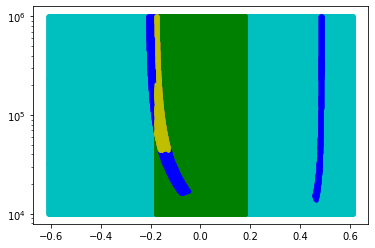

In [121]:
plt.semilogy(df['L5H'],-df['M12'],'c.')
plt.semilogy(dfa['L5H'],-dfa['M12'],'g.')
plt.semilogy(dfh['L5H'],-dfh['M12'],'b.')
plt.semilogy(dfhb['L5H'],-dfhb['M12'],'y.')
plt.savefig('file.png')

In [113]:
dfHB=df[df['h1VV']>0].reset_index(drop=True)

Puntos donde SPheno calcula mal `s(b-a)`

In [118]:
kk=dfHB[(dfHB['s(b-a)'].abs()-dfHB['h1VV'].abs()).abs()>0.3]
kk[kk['mh12']<kk['mh22']].shape

(0, 29)

In [120]:
kk=dfHB[~((dfHB['s(b-a)'].abs()-dfHB['h1VV'].abs()).abs()>0.3)]
kk[kk['mh12']>kk['mh22']].shape

(0, 29)